# **Multidimensional Signal Processing - Krzysztof Wąsik**

This experiment focuses on multidimensional signal processing by analyzing both image and audio signals. We generate a synthetic image featuring a triangle wave pattern across one axis and an audio signal in the form of a triangle wave (500 Hz). We then perform standard analysis using Fourier transforms and visualize the results.

# **1. Synthetic Signal Generation**

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from scipy.io.wavfile import write

# Image: Triangle waveform pattern (horizontal)
def generate_triangle_pattern(size=256):
    img = np.tile(np.linspace(0, 255, size, dtype=np.uint8), (size, 1))
    triangle = np.abs((img.astype(float) - 127.5) * 2)
    cv2.imwrite('triangle_pattern.png', triangle.astype(np.uint8))

# Audio: Triangle wave
def generate_triangle_wave(freq=500, duration=3, fs=44100):
    t = np.linspace(0, duration, int(fs * duration))
    y = 0.5 * sawtooth(2 * np.pi * freq * t, 0.5)
    write('triangle_wave.wav', fs, (y * 32767).astype(np.int16))

generate_triangle_pattern()
generate_triangle_wave()

# **2. Computing the 2D FFT and Visualizing the Magnitude Spectrum**

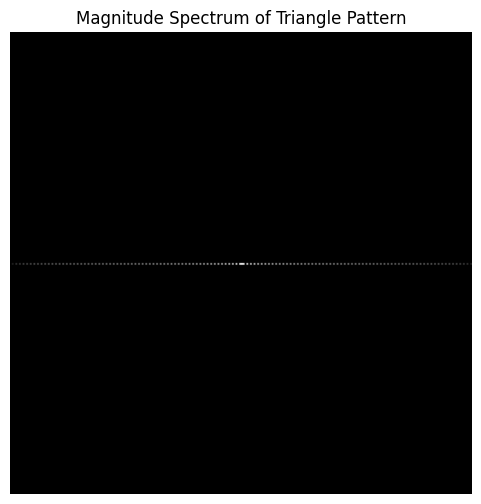

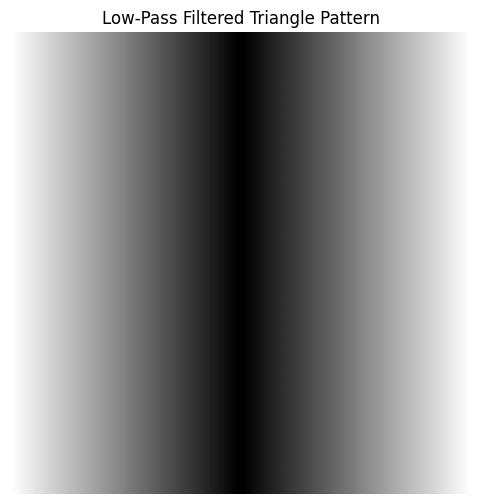

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('triangle_pattern.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Check the file path.")

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum of Triangle Pattern')
plt.axis('off')
plt.show()

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

mask_lp = np.zeros((rows, cols), np.uint8)
r = 50  
cv2.circle(mask_lp, (ccol, crow), r, 1, thickness=-1)

fshift_lp = fshift * mask_lp

f_ishift_lp = np.fft.ifftshift(fshift_lp)
img_back_lp = np.fft.ifft2(f_ishift_lp)
img_back_lp = np.abs(img_back_lp)

plt.figure(figsize=(6, 6))
plt.imshow(img_back_lp, cmap='gray')
plt.title('Low-Pass Filtered Triangle Pattern')
plt.axis('off')
plt.show()

# **3. Time-Domain vs. Frequency-Domain Representations**

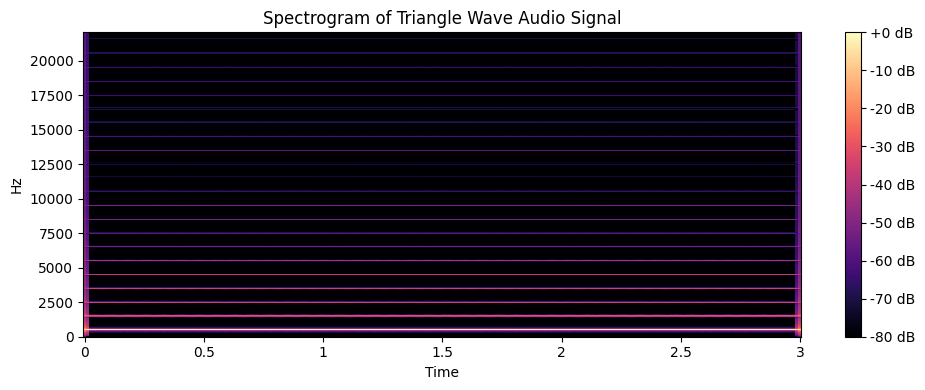

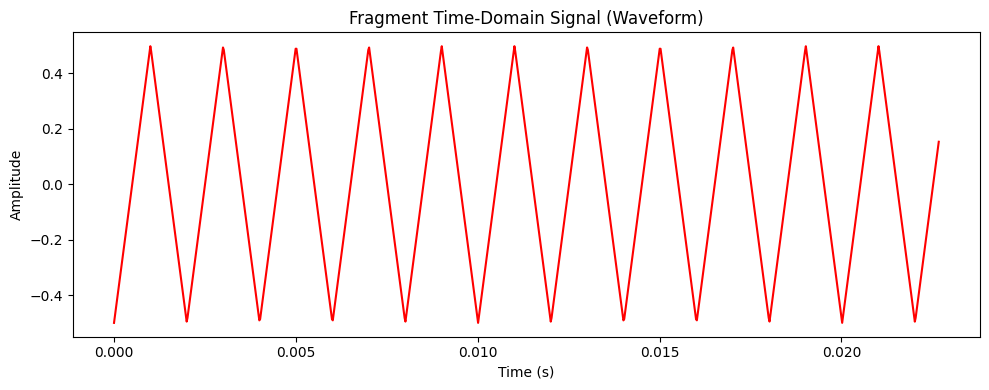

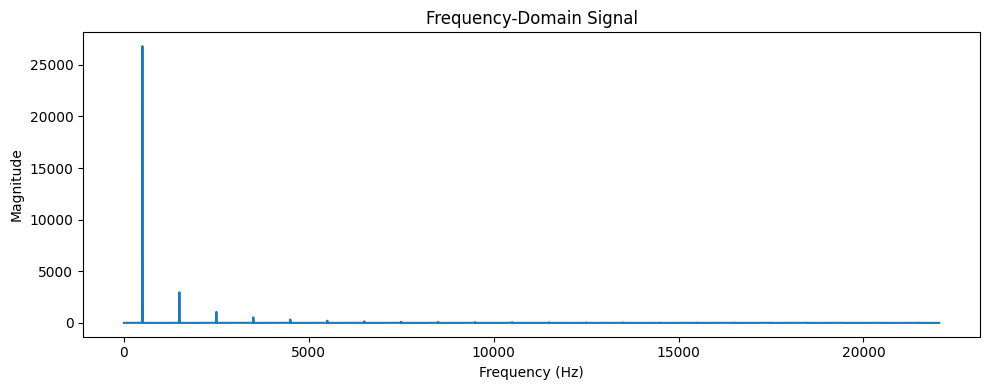

In [ ]:
import librosa
import librosa.display

y, sr = librosa.load('triangle_wave.wav', sr=None)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Triangle Wave Audio Signal')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, 1000/sr, 1000), y[:1000], color='red')
plt.title('Fragment Time-Domain Signal (Waveform)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(Y), 1/sr)

plt.figure(figsize=(10, 4))

plt.plot(freqs[:len(freqs)//2], np.abs(Y[:len(Y)//2]))
plt.title('Frequency-Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

# **4. Conclusion**
This raport demonstrated the generation and analysis of synthetic triangle wave signals in both image and audio formats. Using Fourier transforms, we examined the frequency content of the signals, revealing the expected periodic components, especially around 500 Hz for audio. Filtering in the frequency domain effectively removed high-frequency noise and allowed for signal reconstruction.